# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Creating Dataframe 

In [2]:
df = pd.read_csv('C:/Users/yashb/Downloads/train.csv')
df2 = df
df.head()
df.describe()

,fraud,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,driver_relationship_other,policy_state_id,incident_hour,vehicle_claim,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
count,16000.000000,16000.000000,16000.000000,16000.00000,16000.000000,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.029750,0.047688,0.621000,751.15625,0.865688,0.06950,6.711188,0.373063,1.410625,0.576375,...,0.039188,0.027312,11.787313,17419.563000,0.859375,2926.228125,0.113312,0.121563,0.220062,0.428000
std,0.169902,0.213111,0.485153,13.59870,1.094519,0.25431,3.654909,0.483634,0.894602,0.494148,...,0.194047,0.162998,5.349333,10070.449191,0.347645,142.984114,0.316984,0.326790,0.414301,0.494804
min,0.000000,0.000000,0.000000,750.00000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1000.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,750.00000,0.000000,0.00000,3.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,8.000000,10423.000000,1.000000,2950.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,750.00000,0.000000,0.00000,7.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,12.000000,15000.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,750.00000,2.000000,0.00000,10.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,16.000000,22071.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1100.00000,5.000000,1.00000,12.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,23.000000,51051.000000,1.000000,3000.000000,1.000000,1.000000,1.000000,1.000000


# Datatypes of Columns

In [3]:
df.dtypes

fraud                                int64
incident_type_theft                  int64
policy_state_ca                      int64
policy_deductable                    int64
num_witnesses                        int64
policy_state_or                      int64
incident_month                       int64
customer_gender_female               int64
num_insurers_past_5_years            int64
customer_gender_male                 int64
total_claim_amount                 float64
authorities_contacted_police         int64
incident_day                         int64
collision_type_side                  int64
customer_age                         int64
customer_education                   int64
driver_relationship_child            int64
driver_relationship_spouse           int64
injury_claim                       float64
incident_dow                         int64
collision_type_na                    int64
incident_severity                    int64
driver_relationship_self             int64
num_claims_

# Reading Test Data and checking the datatypes of columns

In [4]:
df_test = pd.read_csv('C:/Users/yashb/Downloads/test.csv')
df_test.head()
#df.describe()

,fraud,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,driver_relationship_other,policy_state_id,incident_hour,vehicle_claim,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,0,0,1,750,1,0,9,1,1,0,...,0,0,1,37000.0,1,3000,0,0,0,1
1,0,0,0,750,1,0,5,0,1,1,...,0,0,18,34500.0,1,2700,0,1,1,0
2,0,0,1,750,0,0,4,0,1,1,...,0,0,18,12000.0,0,3000,0,0,0,0
3,0,0,0,750,5,0,10,1,5,0,...,0,0,15,14000.0,1,2750,1,0,0,1
4,0,0,0,750,1,0,8,1,1,0,...,0,0,3,35000.0,1,3000,0,1,1,0


In [5]:
df_test.dtypes

fraud                                int64
incident_type_theft                  int64
policy_state_ca                      int64
policy_deductable                    int64
num_witnesses                        int64
policy_state_or                      int64
incident_month                       int64
customer_gender_female               int64
num_insurers_past_5_years            int64
customer_gender_male                 int64
total_claim_amount                 float64
authorities_contacted_police         int64
incident_day                         int64
collision_type_side                  int64
customer_age                         int64
customer_education                   int64
driver_relationship_child            int64
driver_relationship_spouse           int64
injury_claim                       float64
incident_dow                         int64
collision_type_na                    int64
incident_severity                    int64
driver_relationship_self             int64
num_claims_

# Changing Datatypes of Columns

In [6]:
num_to_cat = ['fraud', 'incident_type_theft', 'policy_state_ca', 'policy_state_or', 'customer_gender_female', 
              'customer_gender_male', 'authorities_contacted_police', 'collision_type_side', 'driver_relationship_child', 
              'driver_relationship_spouse', 'collision_type_na', 'incident_severity', 'driver_relationship_self', 
              'policy_state_nv', 'authorities_contacted_ambulance', 'policy_liability', 'police_report_available', 
              'driver_relationship_na', 'incident_type_breakin', 'authorities_contacted_none', 'authorities_contacted_fire',
             'driver_relationship_other', 'policy_state_id', 'incident_type_collision', 'policy_state_az', 'policy_state_wa', 
             'collision_type_rear', 'collision_type_front']
for column in num_to_cat:
    df2[column] = df2[column].astype('object')
    
for column in num_to_cat:
    df_test[column] = df_test[column].astype('object')

# Splitting the Dataset into Independent and Dependent Vairables

In [7]:
X = df2.drop(['fraud'], 1) #Train
y = df2['fraud']  #Train

X_test = df_test.drop(['fraud'], 1) #Test
y_test = df_test['fraud']  #Test




In [8]:
print(len(X), len(y), len(X_test), len(y_test))

16000 16000 4000 4000


# Checking for Missing Values in training data

In [7]:
def missing_value(dataframe, value):
    
    '''
        
    Function checks for the columns in which missing_value provided is present
    Takes dataframe to check for missing value and missing value a defined by user as input
    returns those columns as a list
        
    '''
    global cols
    cols = dataframe.isin([value]).any()[dataframe.isin([value]).any() == True].index.tolist()
    print(cols)
    
#Apply function on df2 as ? is there in some of the columns
if __name__ == '__main__':
    value = str(input('Enter missing value: '))
    missing_value(df2, value)

Enter missing value: ?
[]


# Split features into numerical and categorical features

In [9]:
num = X.select_dtypes(include = np.number) #Train
cat = X.select_dtypes(exclude = np.number) #Train

num_test = X_test.select_dtypes(include = np.number) #Test
cat_test = X_test.select_dtypes(exclude = np.number) #Test

print(len(num), len(cat), len(num_test), len(cat_test))

16000 16000 4000 4000


# Initiate a class to make graphs and charts using Training Data

In [51]:
class GraphAndCharts:
    
    #Function to create countplot of categorical features with target variable
    def countplots(self, dataframe, column, hue):
        plt.figure(figsize = (10, 10))
        sns.countplot(dataframe[column], hue = hue)
        plt.legend()
        plt.xticks(rotation = 90)
        plt.title('Distribution of Claim Frauds by {}.'.format(column))
        plt.show()
      
    #Function to create heatmap of numerical features
    def heatmaps(self, dataframe):
        plt.figure(figsize = (10, 10))
        sns.heatmap(dataframe.corr(), annot = True, cmap = 'Blues')
        plt.title('Correlation matrix for numerical features')
        plt.show()
        
    #Function to create pairplot of numerical features with target variable
    def pairplots(self, dataframe):
        plt.figure(figsize = (20, 20))
        sns.pairplot(dataframe)
        plt.title('Scatter and Density plot')
        plt.show()
        
        
    #Function to create roc_auc_curve
    def roc_auc_curve(self, estimator, x_val, y_true):
        y_proba = estimator.predict_proba(x_val)[::,1]
        fpr, tpr, _ = roc_curve(y_val,  y_proba)
        auc = round(roc_auc_score(y_val, y_proba), 3)
        plt.figure(figsize = (10, 10))
        sns.lineplot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.title("ROC AUC Curve for Fraud Detection")
        plt.show()
        
    #Function to create roc_auc_curve for test
    def roc_auc_curve_test(self, estimator, x_test, y_true):
        y_proba = estimator.predict_proba(x_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_proba)
        auc = round(roc_auc_score(y_test, y_proba), 3)
        plt.figure(figsize = (10, 10))
        sns.lineplot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.title("ROC AUC Curve for Fraud Detection")
        plt.show()
        
    #Function to create classification report
    def classification_graph(self, y_true, y_predict):
        clf_report = classification_report(y_true, y_predict, target_names = ['No', 'Yes'], output_dict=True)
        plt.figure(figsize = (8, 7))
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        plt.title('Classification Report of Model')
        plt.show()
        
    #Function to create feature importance graph
    def feature_imp_graph(self, estimator, dataframe, feature_column, feature_imp_column):
        sns.barplot(x = dataframe[feature_column], y = dataframe[feature_imp_column])
        plt.xlabel('Features')
        plt.ylabel('Feature Importance')
        plt.title('Feature Importance as per {} Model'.format(estimator))
        plt.xticks(rotation = 90)
        plt.show()



In [52]:
gc = GraphAndCharts()

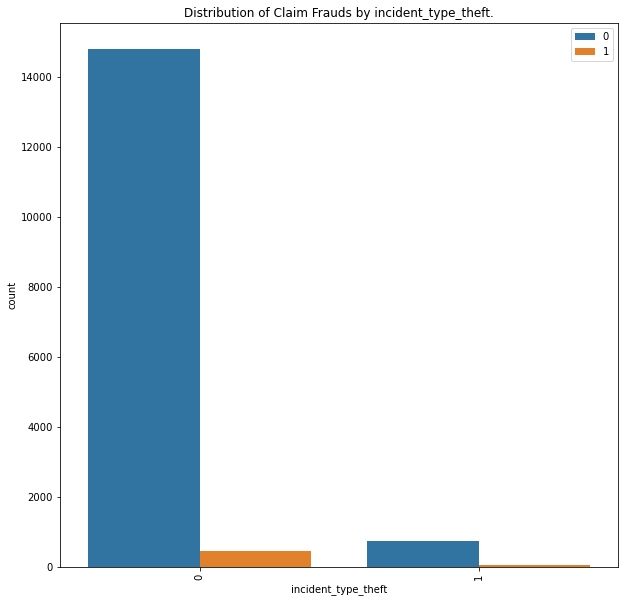

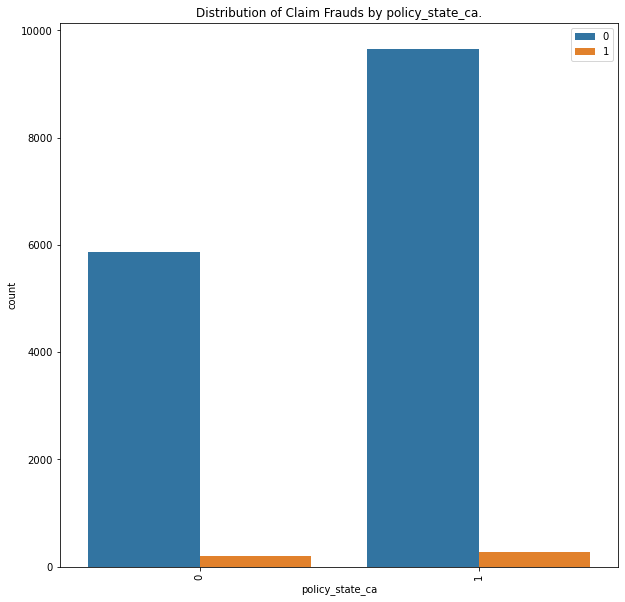

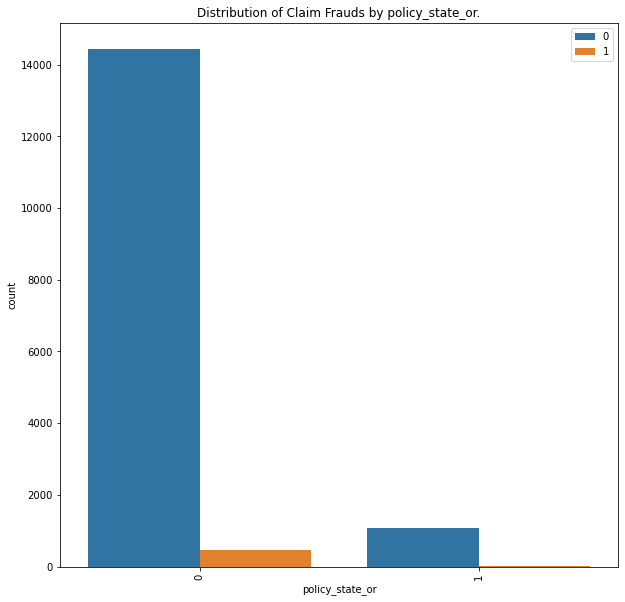

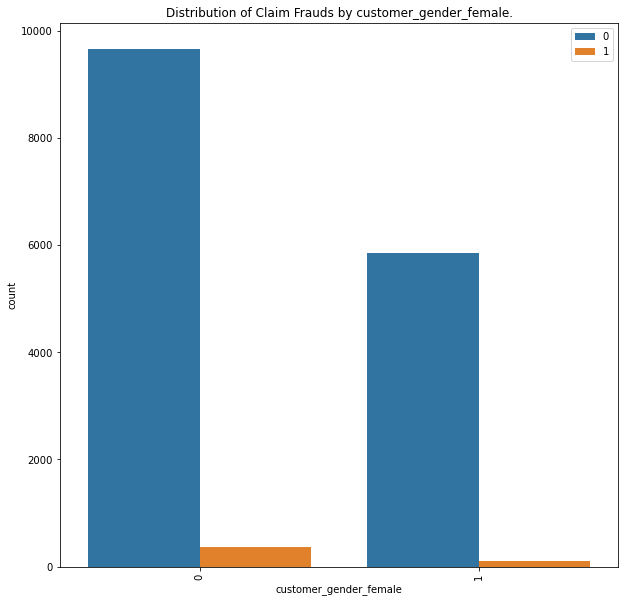

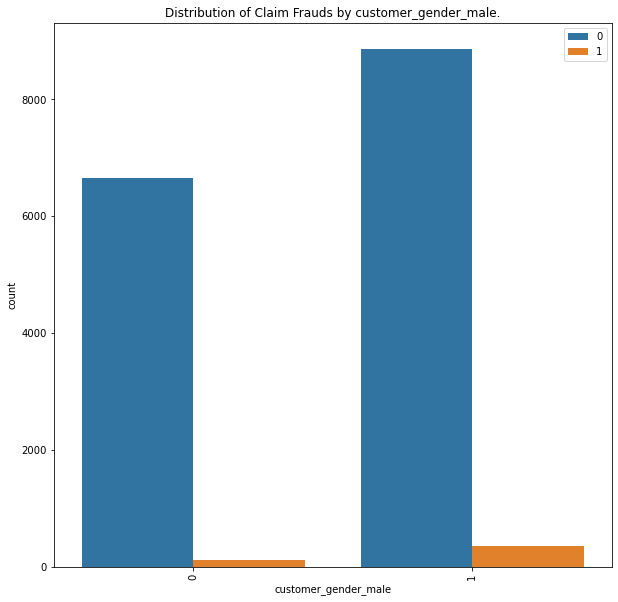

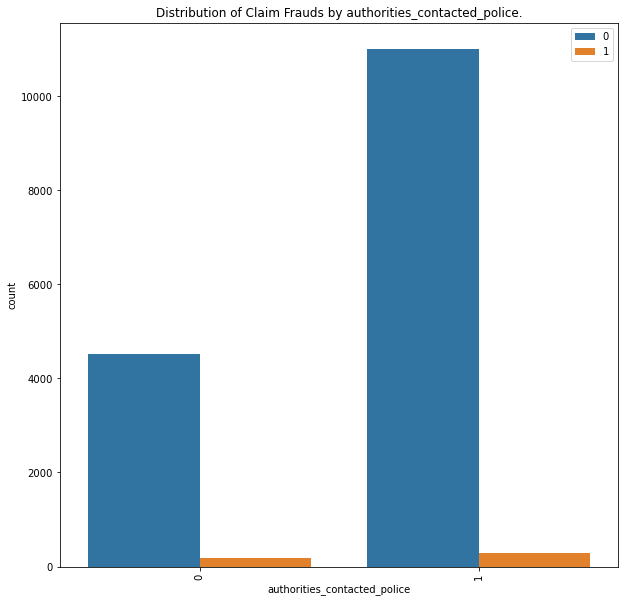

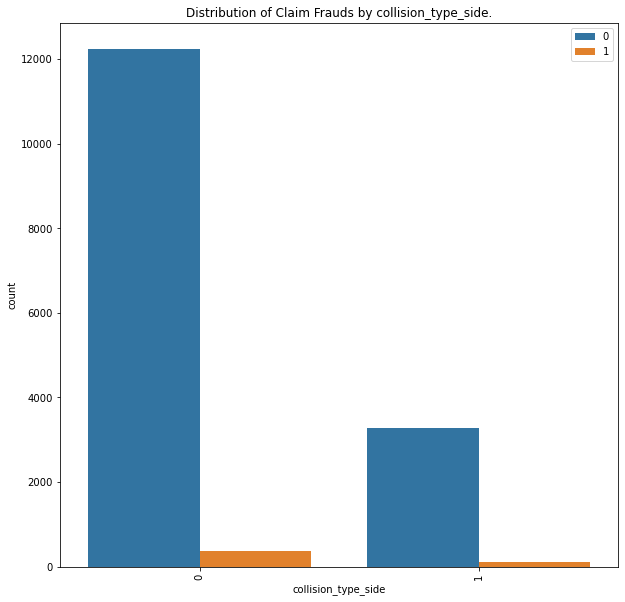

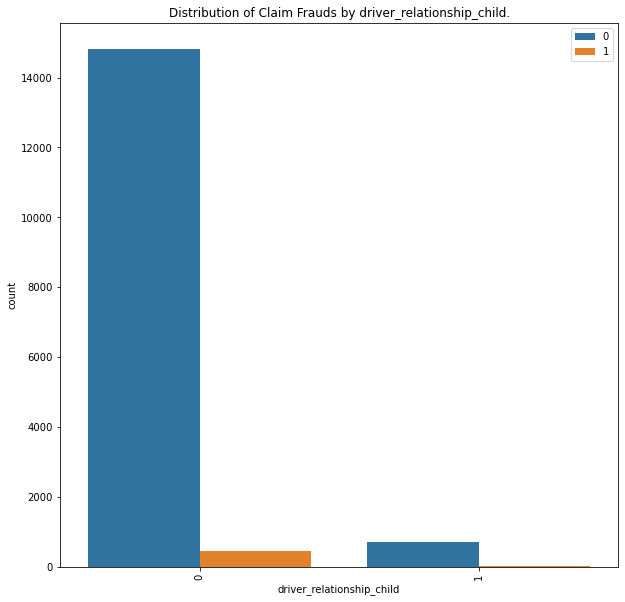

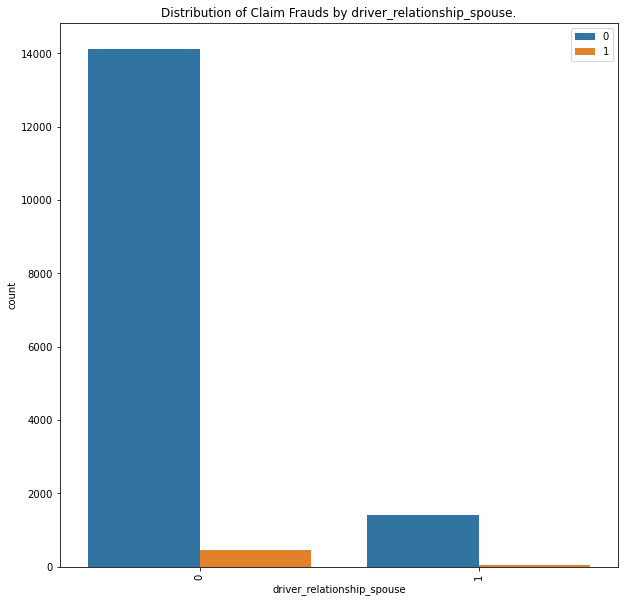

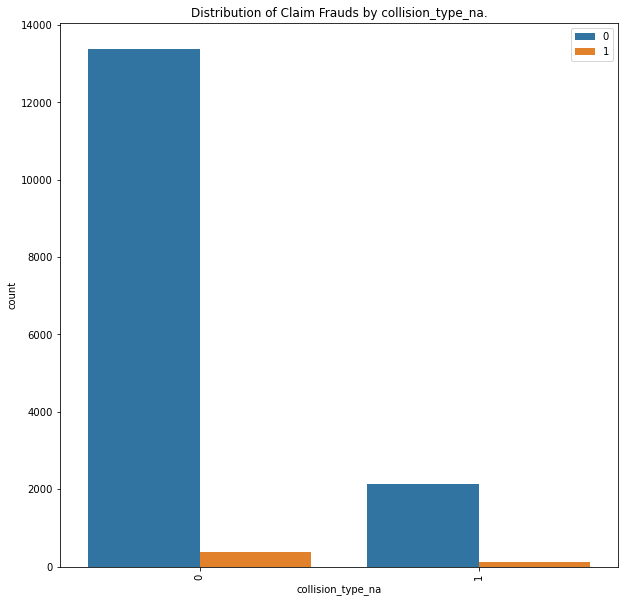

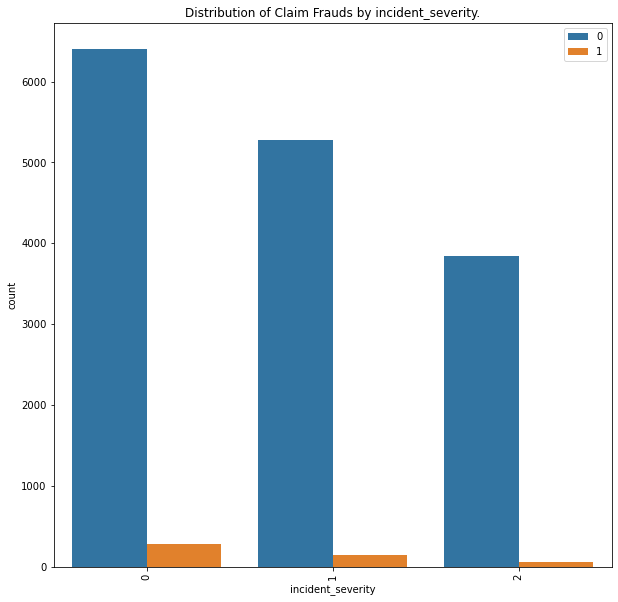

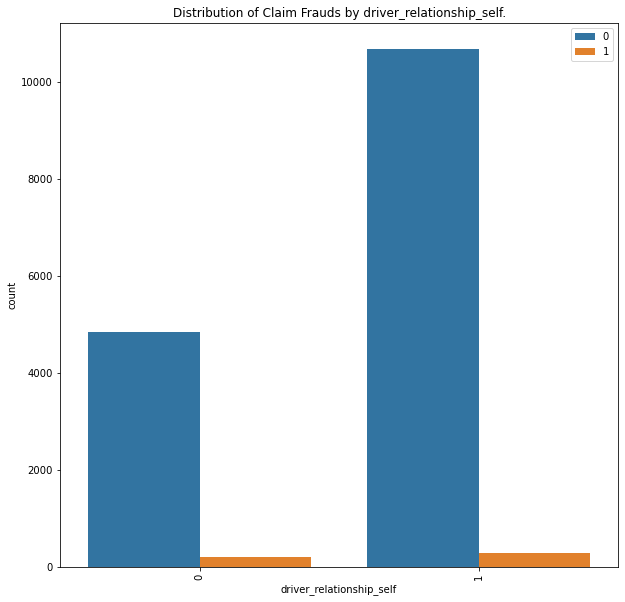

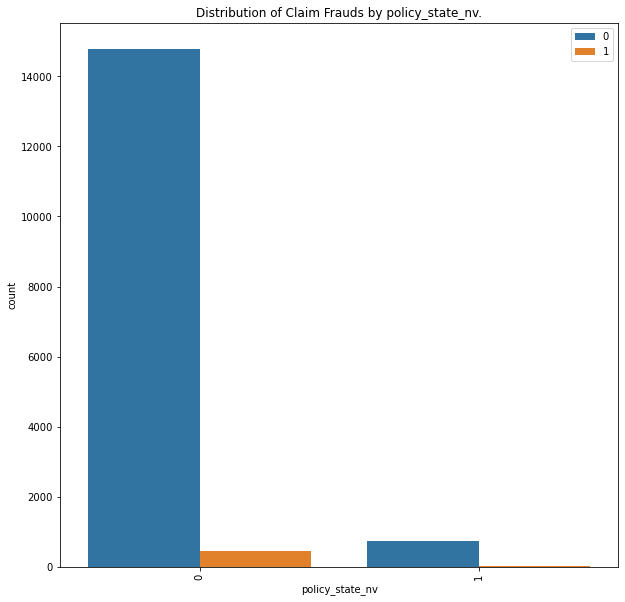

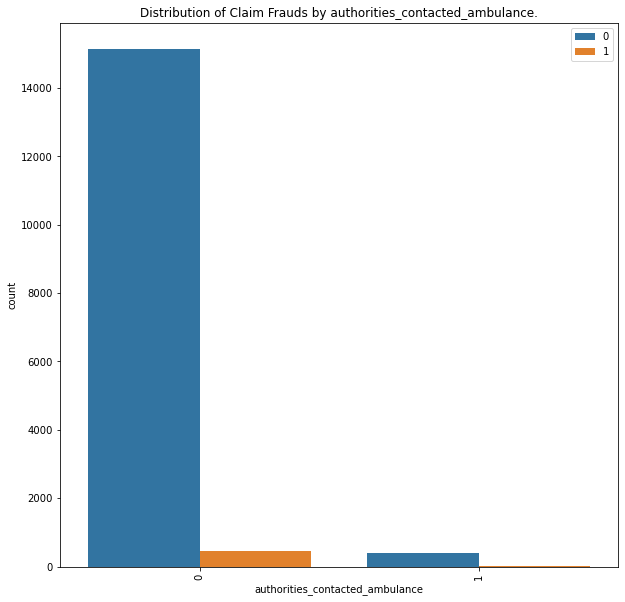

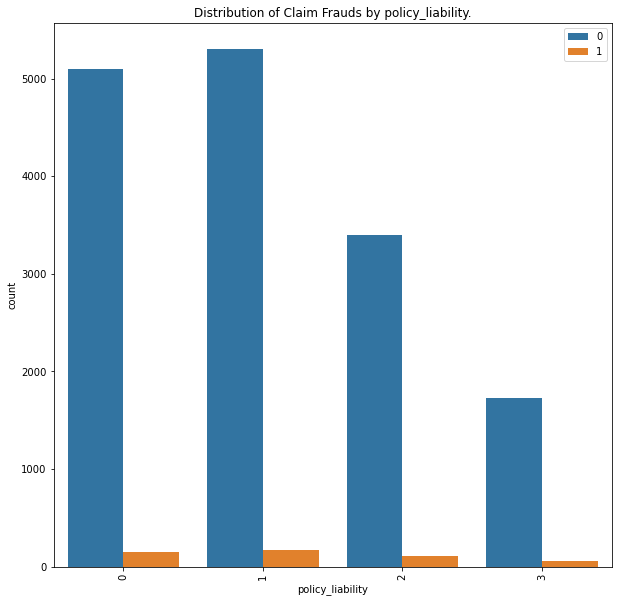

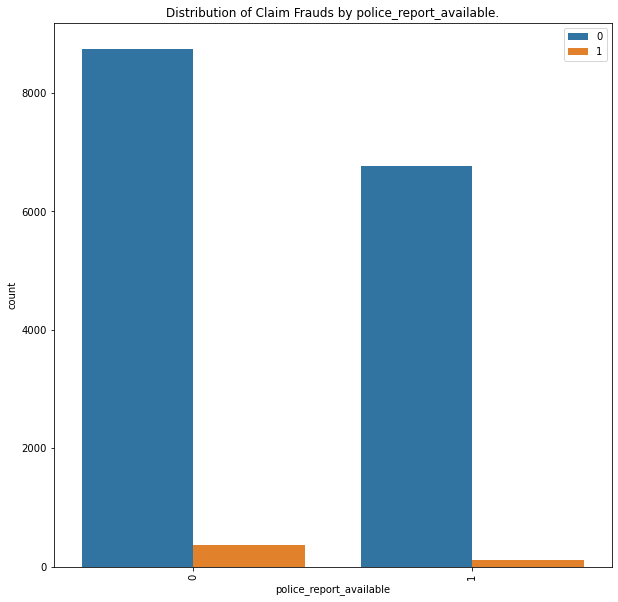

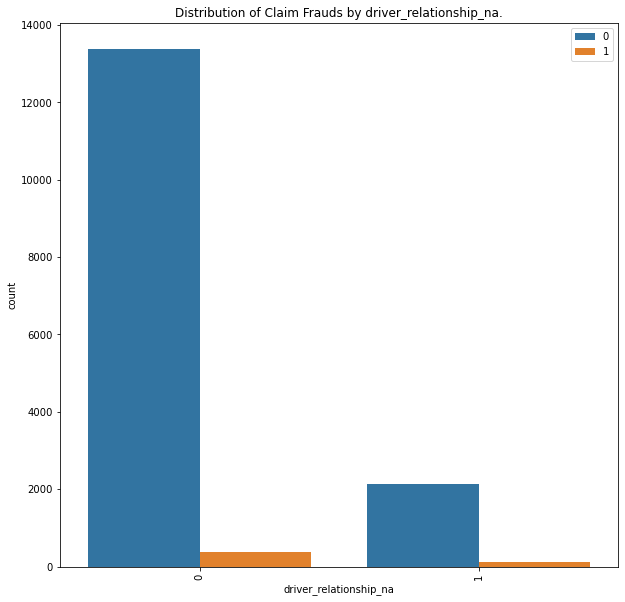

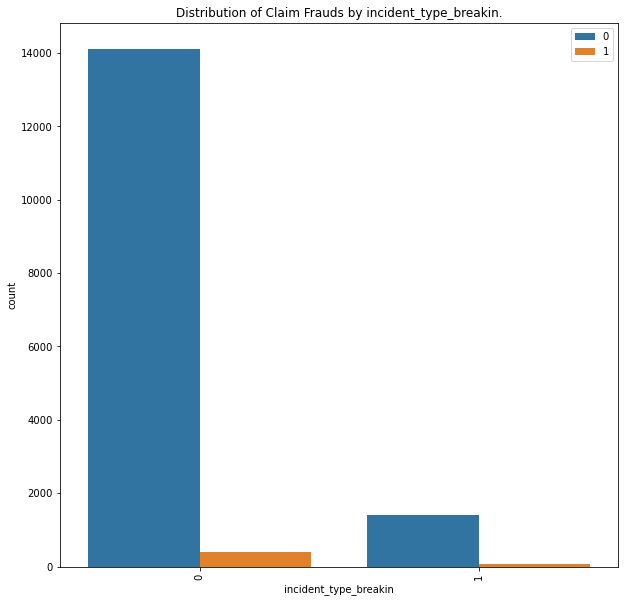

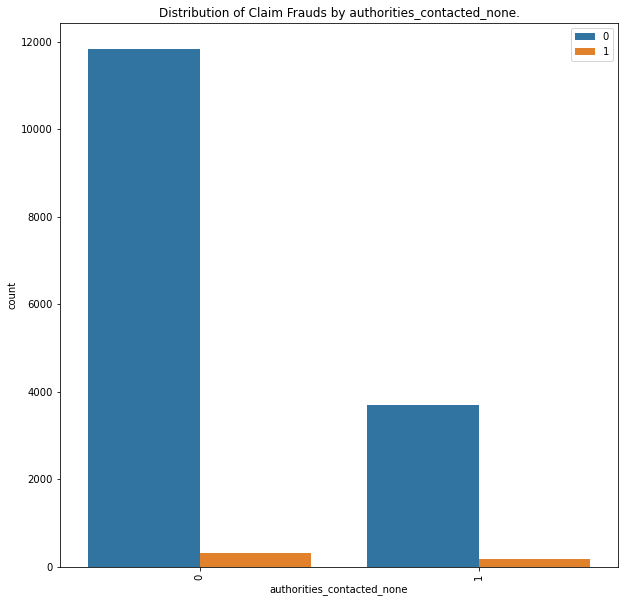

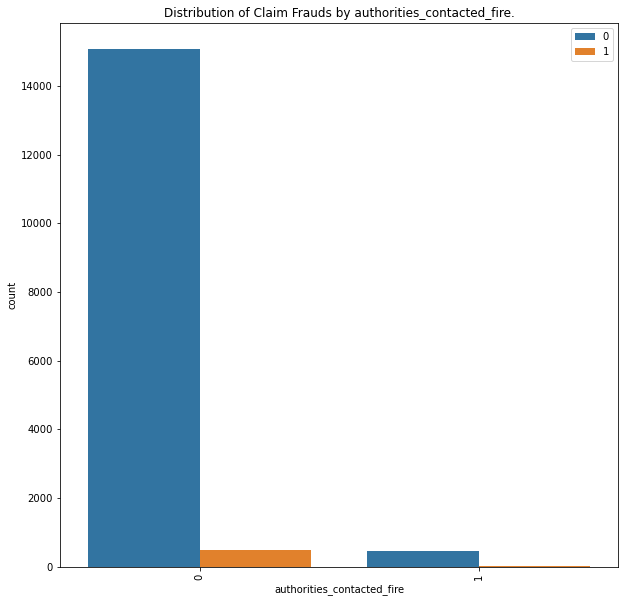

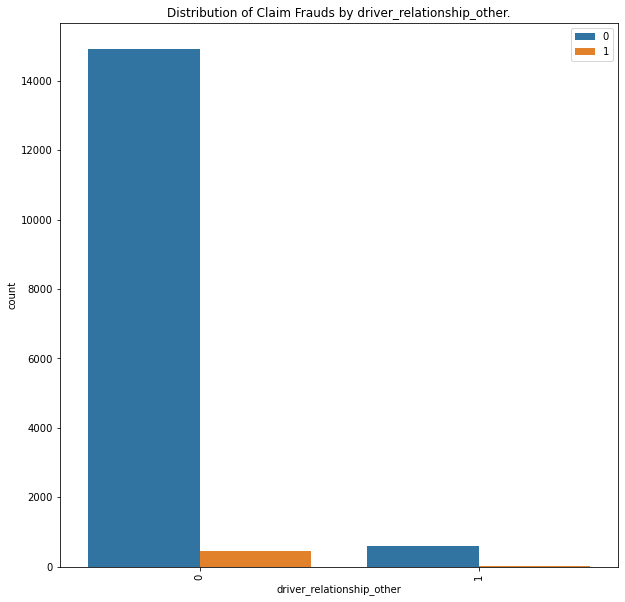

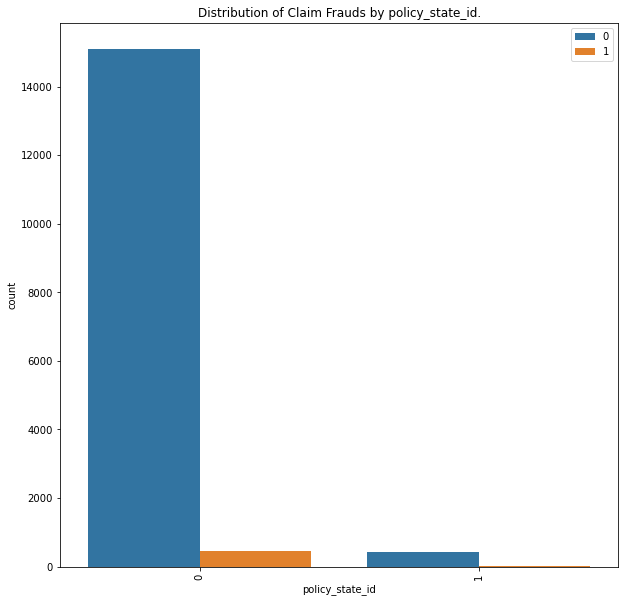

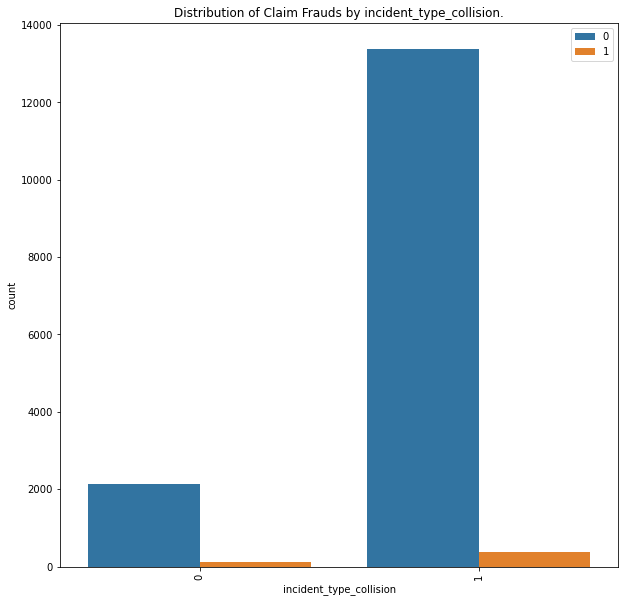

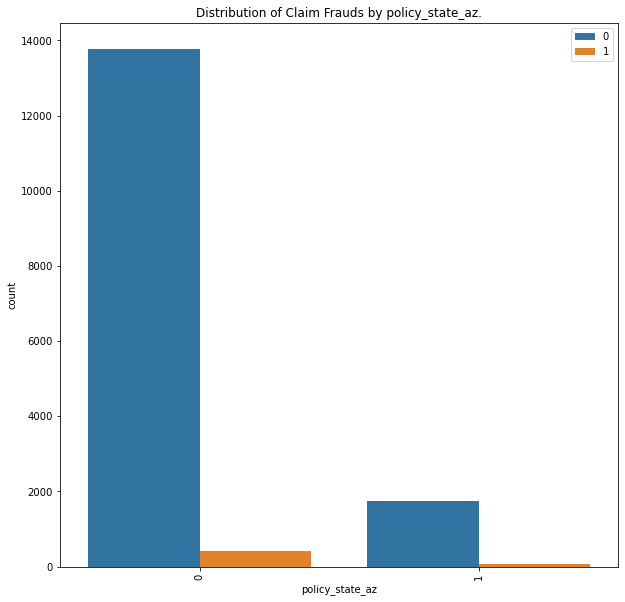

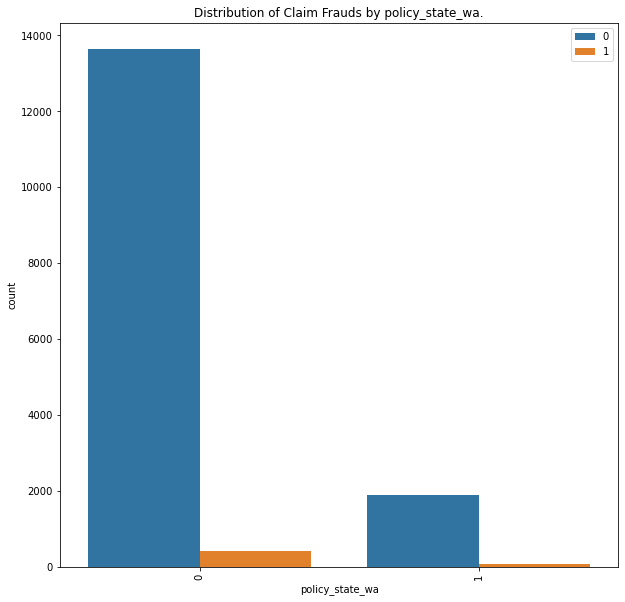

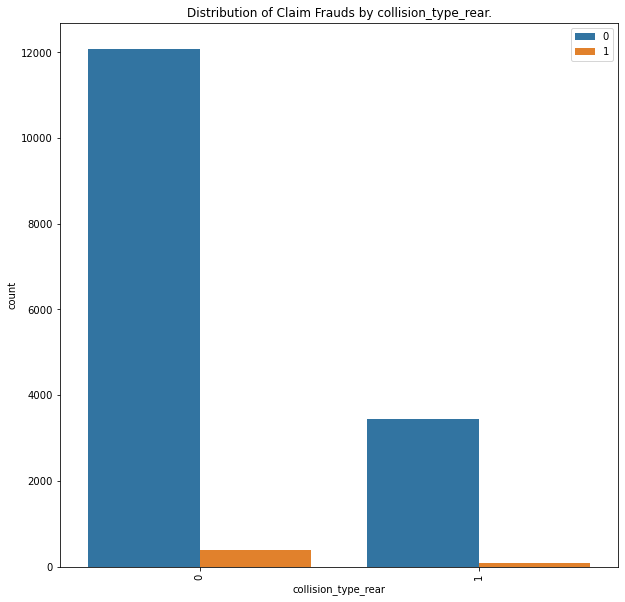

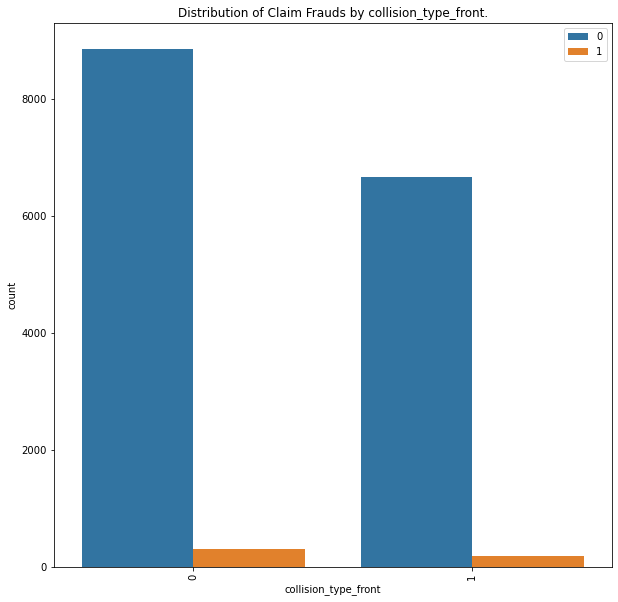

In [31]:
for column in cat:
    if cat[column].nunique() < 50:
        gc.countplots(cat, column, y)

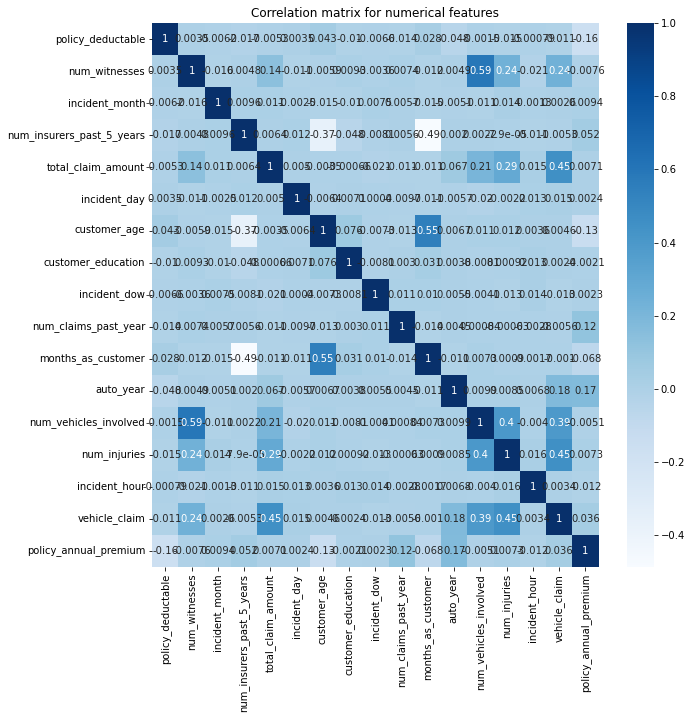

In [32]:
gc.heatmaps(num)


<Figure size 1440x1440 with 0 Axes>

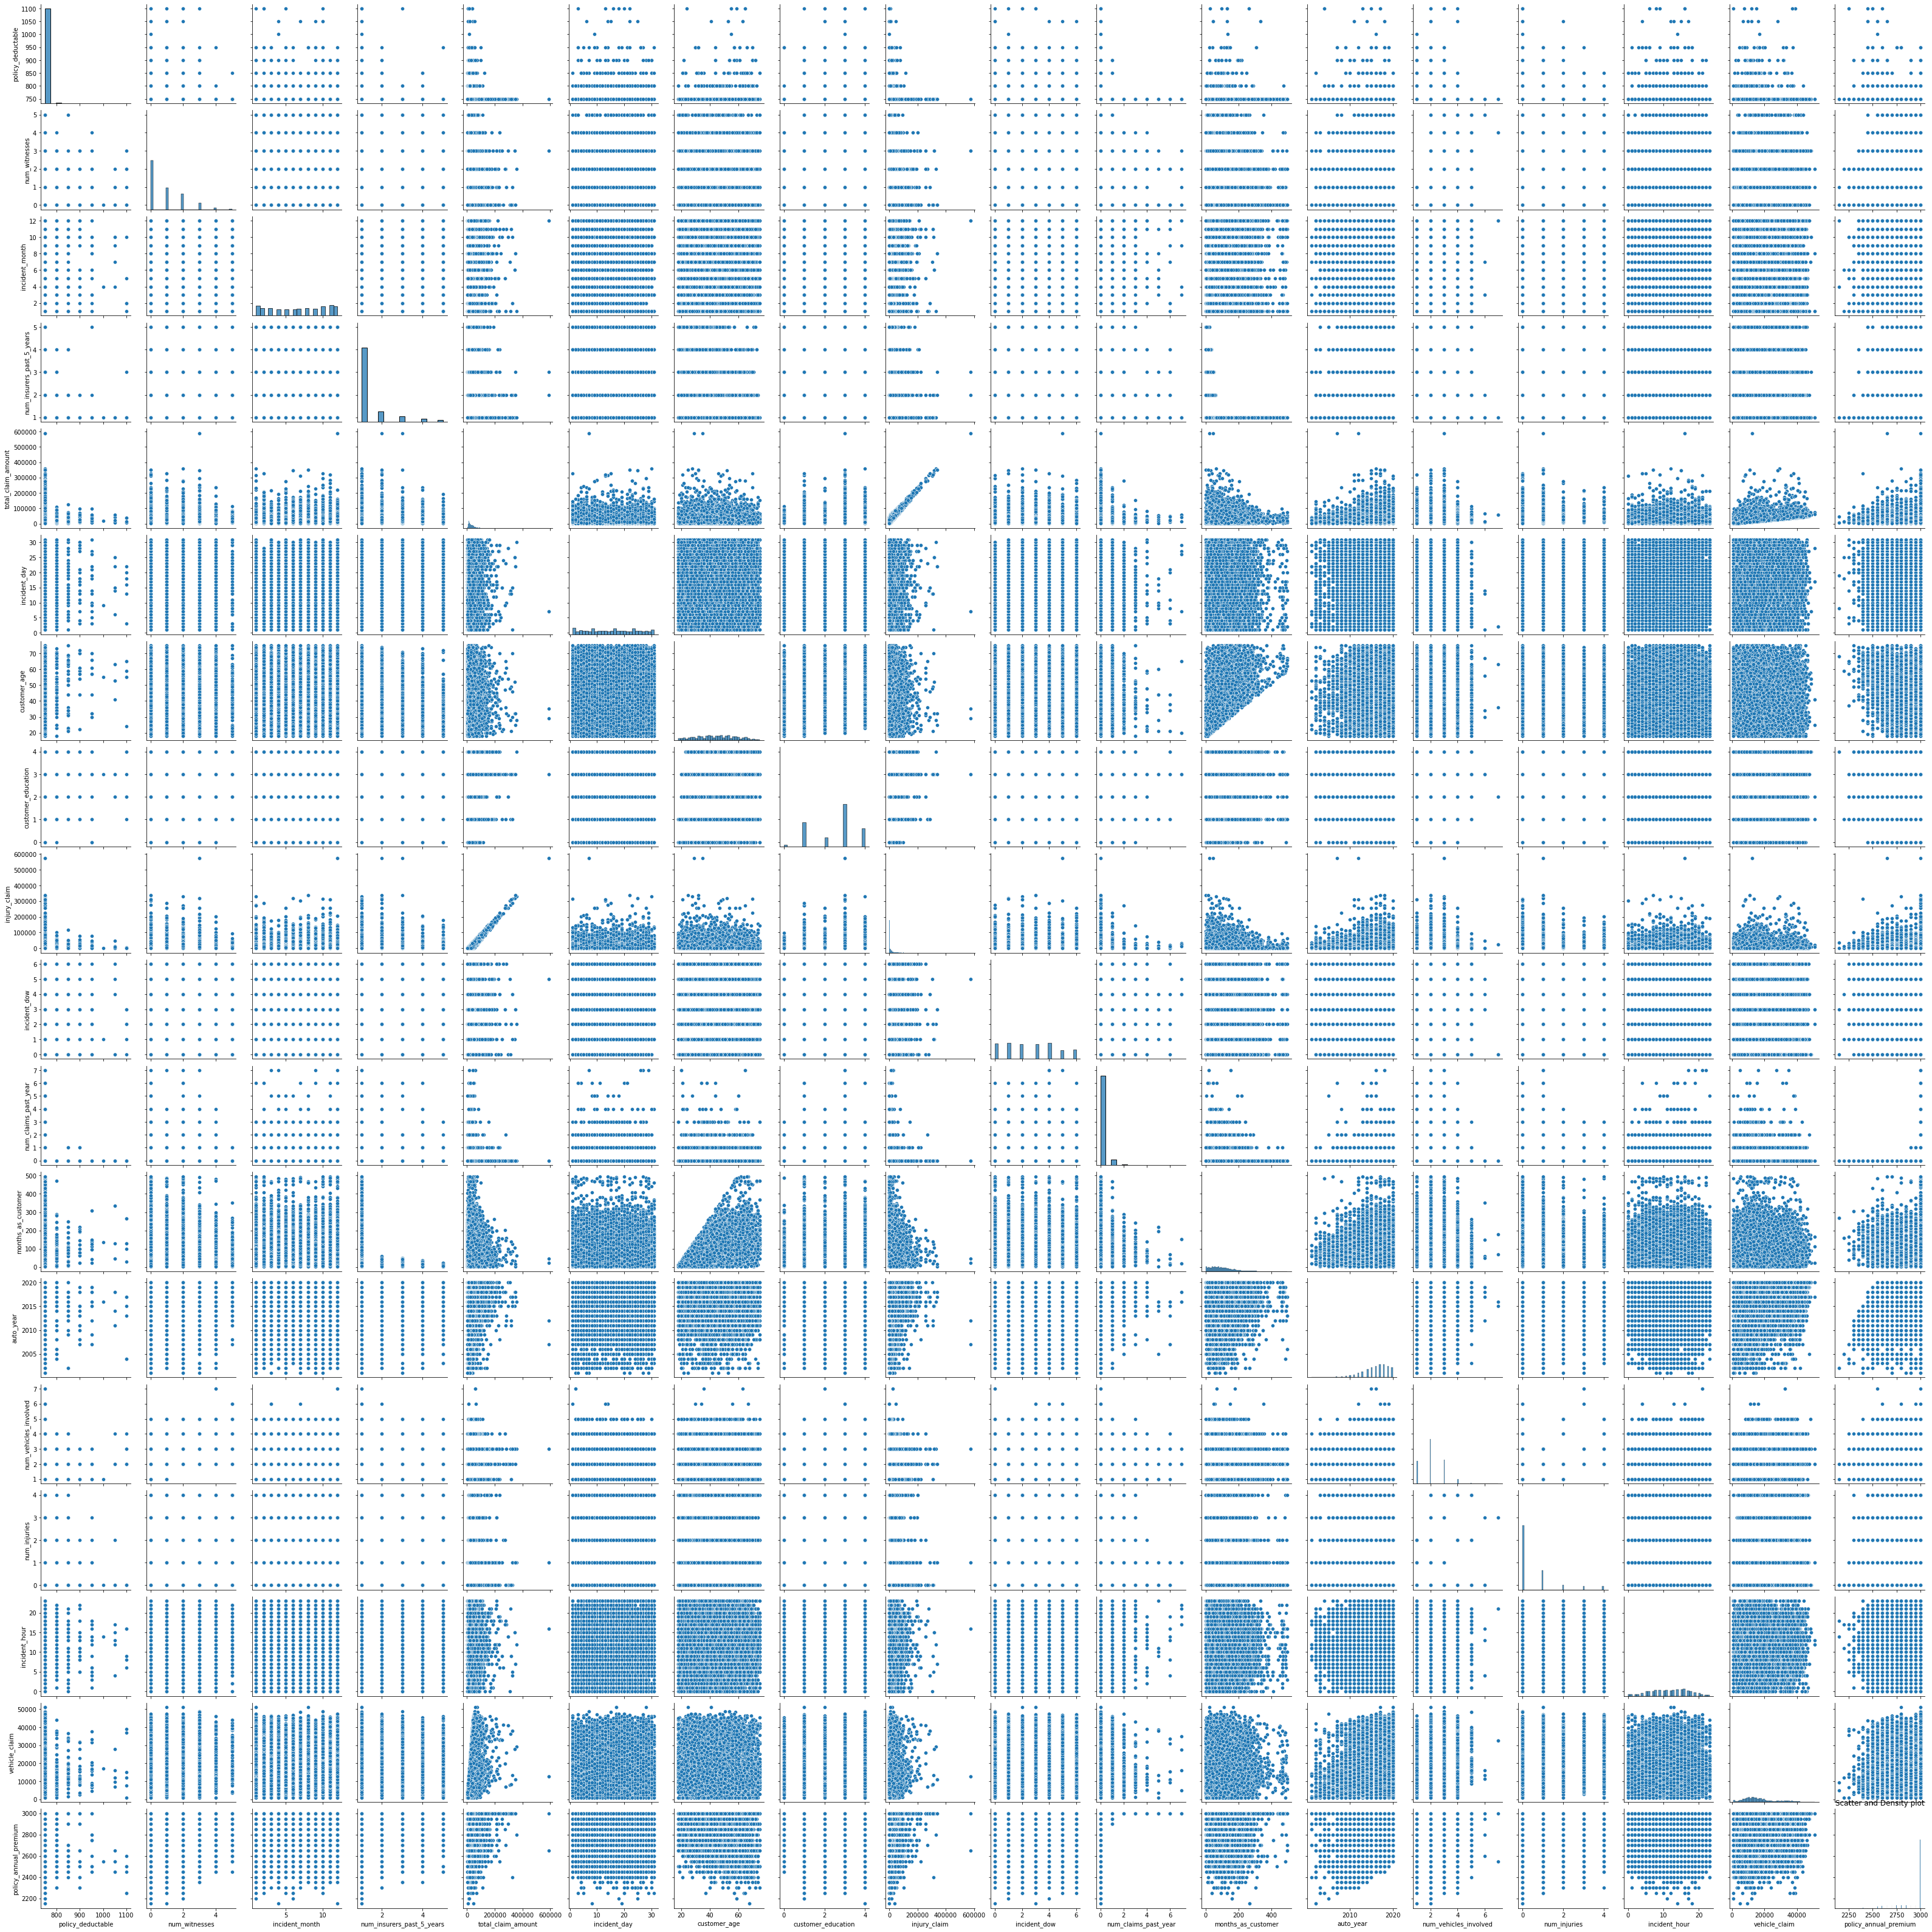

In [17]:
gc.pairplots(num)

# Dropping Numerical Correlations >80% from Train data

In [12]:
corr = num.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = num.columns[columns]
num = num[selected_columns]   #Train
num_test = num_test[selected_columns]  #Test



# Encoding char data from Train data

In [13]:
#Initiate a labelencoder object
d_label = defaultdict(LabelEncoder)
cat = cat.apply(lambda x: d_label[x.name].fit_transform(x))  #Train
cat_test = cat_test.apply(lambda x: d_label[x.name].fit_transform(x))  #Test

X_new = num.join(cat)    #Train
X_new_test = num_test.join(cat_test)  #Test
le = LabelEncoder()
y = le.fit_transform(y)  #Train

y_test = le.fit_transform(y_test) #Test



In [15]:
print(len(X_new), len(y), len(X_new_test), len((y_test)))

16000 16000 4000 4000


# Splitting Data

In [16]:
X_train, X_val, y_train, y_val = tts(X_new, y, test_size = 0.2, random_state = 42, stratify = y)
print(len(X_train), len(y_train), len(X_val), len((y_val)))

12800 12800 3200 3200


# Initiate a base rfc model

In [17]:
rfc = RandomForestClassifier(random_state = 42, oob_score = True)

# Fit model on training data

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

# Make prediction using X_val

In [19]:
prediction_1 = rfc.predict(X_val)

# View classification report

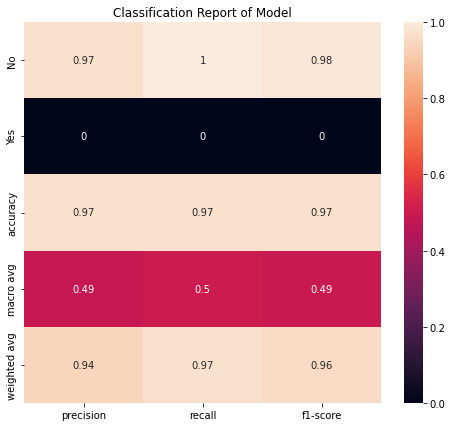

In [20]:
gc.classification_graph(y_val, prediction_1)

# Define params to use in RandomizedSearchCV

In [21]:
params = {'n_estimators' : np.arange(100, 1000, 100), 'max_depth': np.arange(10, 40, 2),
          'min_samples_split': np.arange(0.01, 0.1, 0.01), 'criterion': ['gini', 'entropy'],
          'class_weight': ['balanced', None, 'balanced_subsample']}


# Intialize a RandomizedSearchCV

In [22]:
rfc_cv = RandomizedSearchCV(estimator = rfc, param_distributions= params, cv = 10, random_state = 42)


# Fit RandomizedSearchCV on training data

In [23]:
rfc_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=42),
                   param_distributions={'class_weight': ['balanced', None,
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]),
                                        'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42)

# View Best estimator and save it as rfc

In [24]:
print(rfc_cv.best_estimator_)
rfc = rfc_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12,
                       min_samples_split=0.060000000000000005, n_estimators=200,
                       oob_score=True, random_state=42)


# Fit rfc with best params on training data

In [25]:
rfc.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=12,
                       min_samples_split=0.060000000000000005, n_estimators=200,
                       oob_score=True, random_state=42)

# Make prediction using X_val

In [26]:
prediction_2 = rfc.predict(X_val)

# View classification report

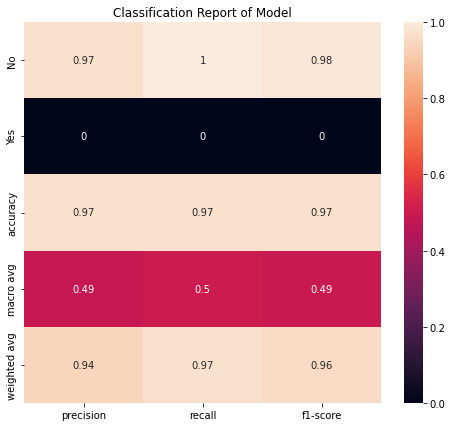

In [27]:
gc.classification_graph(y_val, prediction_2)

# ROC Curve

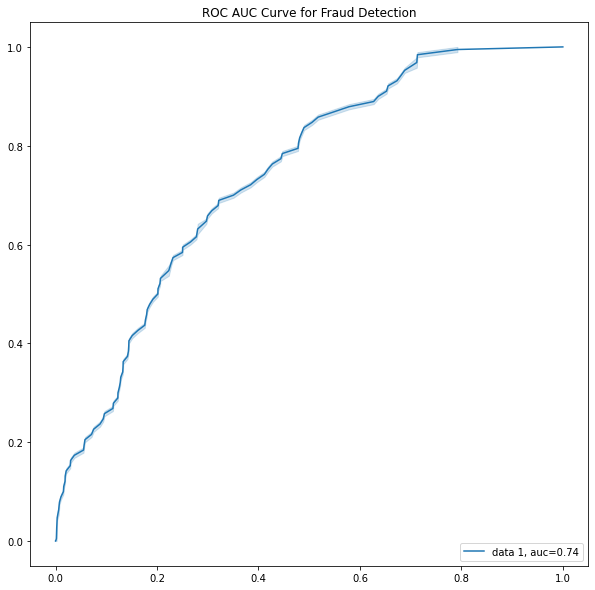

In [36]:
gc.roc_auc_curve(rfc, X_val, y_val)

# Important Features

In [37]:
#Define function to view important features
def feature_importance(estimator, features):
    important_features = pd.DataFrame(list(rfc.feature_importances_), columns = ['feature importance'])
    features = pd.DataFrame(list(features), columns = ['Features'])
    global best_features
    best_features = features.join(important_features)
    best_features = best_features.sort_values(by = 'feature importance', ascending = False)
    print(best_features)
    
#Apply function on rfc
feature_importance(rfc, X_new)

                           Features  feature importance
1                     num_witnesses            0.145557
13                     num_injuries            0.084963
21             customer_gender_male            0.081452
15                    vehicle_claim            0.078061
12            num_vehicles_involved            0.076775
10               months_as_customer            0.070846
3         num_insurers_past_5_years            0.063670
4                total_claim_amount            0.048826
20           customer_gender_female            0.041910
6                      customer_age            0.035155
32          police_report_available            0.031308
5                      incident_day            0.027691
14                    incident_hour            0.026918
2                    incident_month            0.018917
27                incident_severity            0.017529
8                      incident_dow            0.015538
11                        auto_year            0

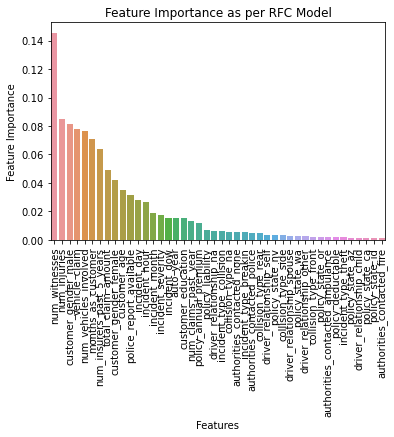

In [38]:
gc.feature_imp_graph('RFC', best_features, 'Features', 'feature importance')

# Dropping Unimportant Features from train, val and test dataset

In [39]:
#Subset best_features on unimportant_features
unimportant_features = best_features[best_features['feature importance'] < 0.01]
list_unimportant_features = unimportant_features['Features'].tolist()
X_train_rfc = X_train.drop(list_unimportant_features, 1)
X_val_rfc = X_val.drop(list_unimportant_features, 1)
X_rfc = X_new.drop(list_unimportant_features, 1)

X_test_rfc = X_new_test.drop(list_unimportant_features, 1)

# Fit model on training data with important features

In [40]:
rfc.fit(X_train_rfc, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12,
                       min_samples_split=0.060000000000000005, n_estimators=200,
                       oob_score=True, random_state=42)

# Make prediction using X_val_rfc

In [41]:
prediction_3 = rfc.predict(X_val_rfc)

# View classification report

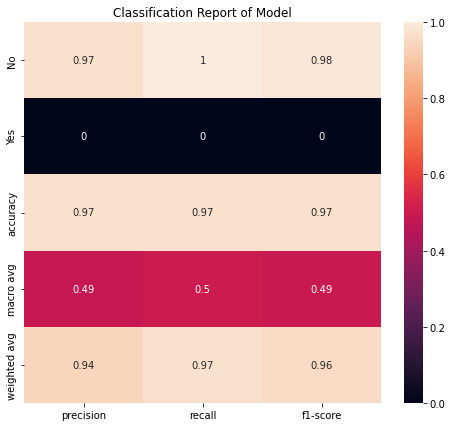

In [42]:
gc.classification_graph(y_val, prediction_3)

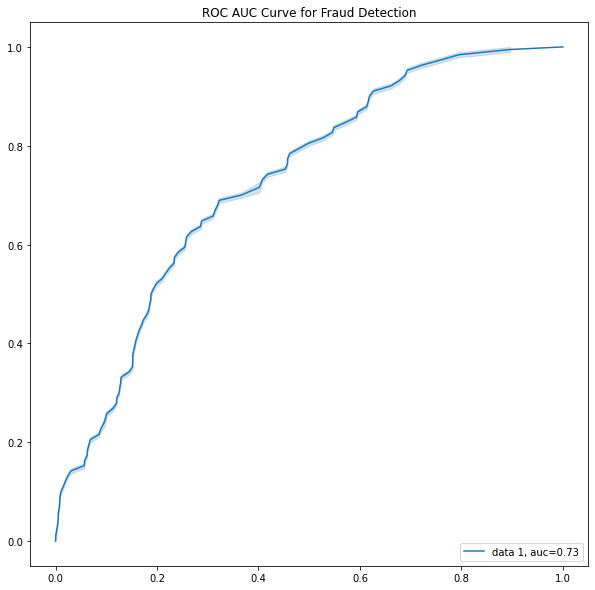

In [43]:
gc.roc_auc_curve(rfc, X_val_rfc, y_val)


# Test Data RFC

In [44]:
prediction_test = rfc.predict(X_test_rfc)

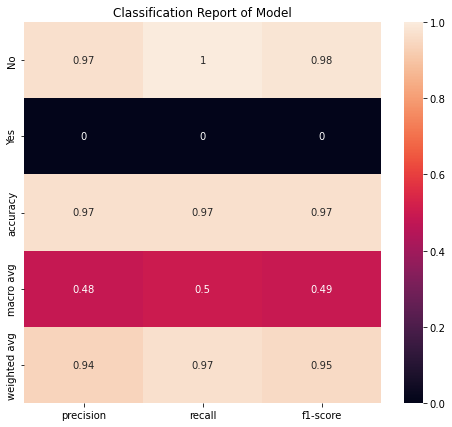

In [45]:
gc.classification_graph(y_test, prediction_test)

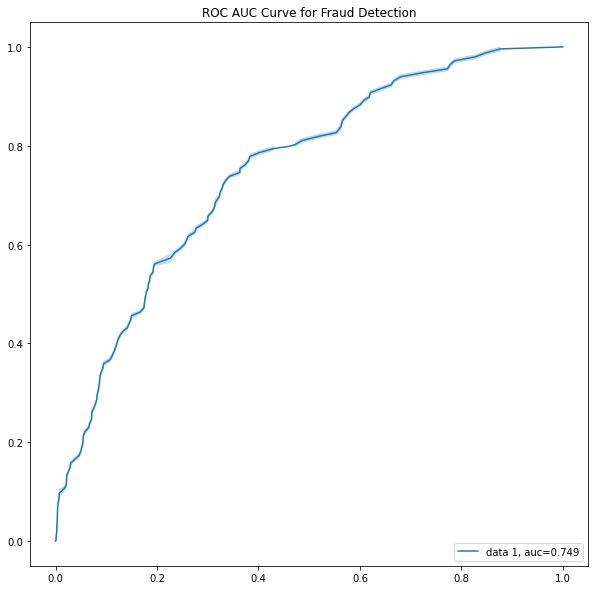

In [53]:
gc.roc_auc_curve_test(rfc, X_test_rfc, y_test)

# XGBoost Model

In [54]:
xgbc = XGBClassifier(random_state = 42)

In [55]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [56]:
prediction_xgb_1 = xgbc.predict(X_val)

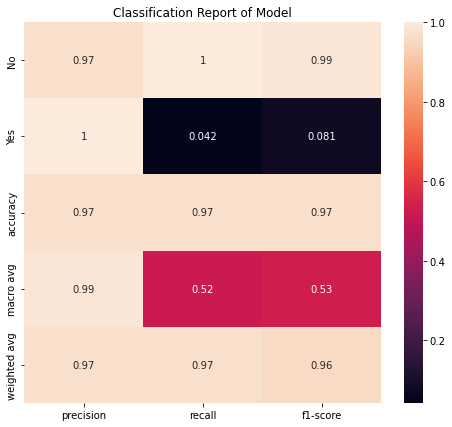

In [57]:
gc.classification_graph(y_val, prediction_xgb_1)

In [58]:
params_xgbc = {'learning_rate': np.arange(0.01, 0.1, 0.01), 'max_depth': np.arange(10, 40, 2),
               'max_delta_step': np.arange(1, 10, 1), 'lambda': np.arange(1, 5, 1), 'alpha': np.arange(1, 5, 1)}

In [59]:
xgbc_cv = RandomizedSearchCV(estimator = xgbc, param_distributions= params_xgbc, cv = 10, random_state = 42)


In [60]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30...
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
   

In [61]:
print(xgbc_cv.best_estimator_)
xgbc = xgbc_cv.best_estimator_

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=2, learning_rate=0.08,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=8, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, ...)


In [62]:
xgbc.fit(X_train, y_train)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=2, learning_rate=0.08,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=8, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, ...)

In [63]:
prediction_xgb_2 = xgbc.predict(X_val)

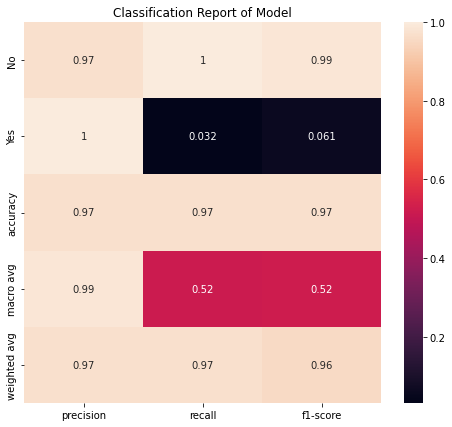

In [64]:
gc.classification_graph(y_val, prediction_xgb_2)

In [65]:
feature_importance(xgbc, X_new)

                           Features  feature importance
0                 policy_deductable            0.143666
12            num_vehicles_involved            0.103578
11                        auto_year            0.090050
9              num_claims_past_year            0.089671
17              incident_type_theft            0.080355
2                    incident_month            0.071673
14                    incident_hour            0.067656
3         num_insurers_past_5_years            0.058787
16            policy_annual_premium            0.045845
5                      incident_day            0.040532
4                total_claim_amount            0.035780
13                     num_injuries            0.032958
19                  policy_state_or            0.024797
18                  policy_state_ca            0.018790
7                customer_education            0.018688
1                     num_witnesses            0.018433
10               months_as_customer            0

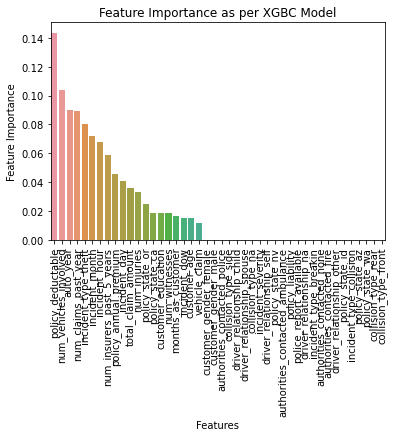

In [66]:
gc.feature_imp_graph('XGBC', best_features, 'Features', 'feature importance')

In [96]:
#Subset best_features on unimportant_features
best_features['feature importance'] = best_features['feature importance'].replace(np.nan, 0)
unimportant_features = best_features[best_features['feature importance'] < 0.01]
list_unimportant_features = unimportant_features['Features'].tolist()
X_train_xgbc = X_train.drop(list_unimportant_features, 1)
X_val_xgbc = X_val.drop(list_unimportant_features, 1)
X_test_xgbc = X_new_test.drop(list_unimportant_features, 1)
X_xgbc = X_new.drop(list_unimportant_features, 1)




In [97]:
X_train_xgbc
#

,policy_deductable,num_witnesses,incident_month,num_insurers_past_5_years,total_claim_amount,incident_day,customer_age,customer_education,incident_dow,num_claims_past_year,months_as_customer,auto_year,num_vehicles_involved,num_injuries,incident_hour,vehicle_claim,policy_annual_premium,incident_type_theft,policy_state_ca,policy_state_or
859,750,0,4,1,4000.0,4,62,4,3,0,197,2011,1,0,18,4000.0,2800,0,0,0
4570,750,0,11,1,14083.0,28,43,1,3,0,112,2014,2,0,6,11583.0,3000,0,1,0
14600,750,0,5,1,38608.0,1,53,3,2,0,112,2016,1,0,17,8608.0,3000,0,1,0
6613,750,1,7,1,39500.0,20,39,1,5,0,92,2018,3,1,17,31000.0,3000,0,0,0
5082,750,0,11,1,18121.0,21,46,3,3,0,138,2017,1,0,13,9221.0,3000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,750,1,6,1,45695.0,26,39,3,2,0,97,2016,3,4,9,33795.0,3000,0,0,0
6618,750,2,2,4,29500.0,8,36,3,4,0,8,2015,3,3,9,17500.0,3000,0,1,0
3802,750,0,5,1,126860.0,5,30,4,6,0,19,2019,2,0,11,17160.0,3000,0,1,0
10432,750,1,9,1,47877.0,3,53,3,1,0,253,2019,4,4,9,36077.0,3000,0,0,0


In [94]:
X_test_xgbc = X_test_xgbc.drop('incident_type_theft', axis=1)    

In [74]:
xgbc.fit(X_train_xgbc, y_train)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=2, learning_rate=0.08,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=8, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, ...)

In [75]:
prediction_xgb_3 = xgbc.predict(X_val_xgbc)

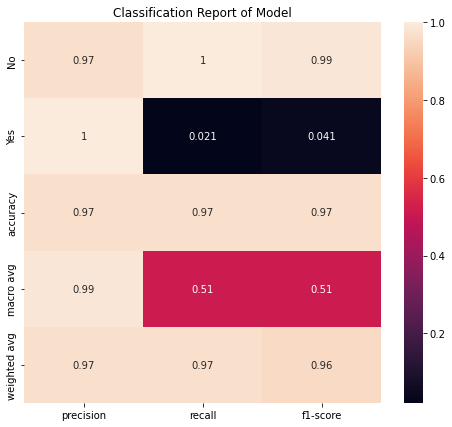

In [76]:
gc.classification_graph(y_val, prediction_xgb_3)

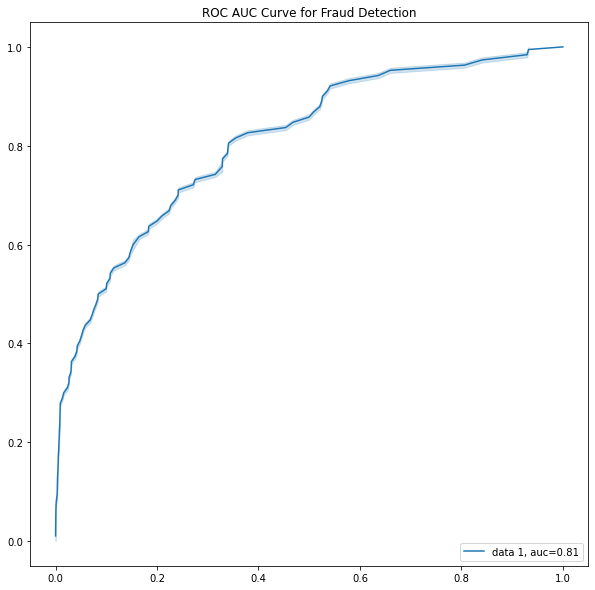

In [77]:
gc.roc_auc_curve(xgbc, X_val_xgbc, y_val)

# Test Data XGB

In [98]:
prediction_xgb_test = xgbc.predict(X_test_xgbc)

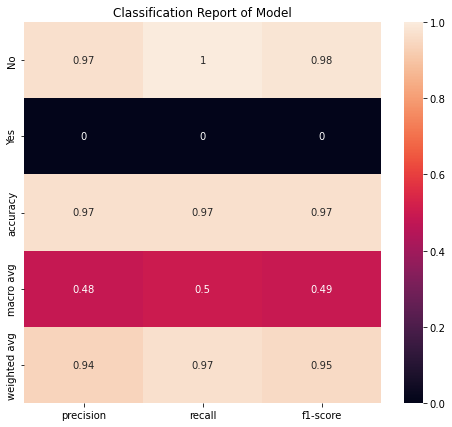

In [100]:
gc.classification_graph(y_test, prediction_xgb_test)

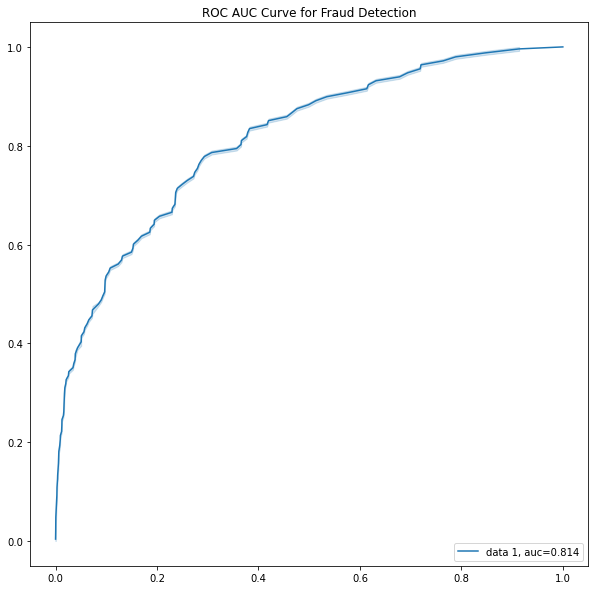

In [99]:
gc.roc_auc_curve_test(xgbc, X_test_xgbc, y_test)